# Compare the UVJ from the selection, vs the UVJ recalculated with the filters and astSED

In [34]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
import sys
sys.path.append('../')
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath


# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
# All we are doing in this script is reading in 2 dataframes, and plotting the uv, and vj coordinates
# of the sources in the dataframes. We are also plotting the SED of the sources in the dataframes.
# read in the first 
# read in the first dataframe
selected_ids_df = pd.read_csv('selected_uvj_data_ids.csv')
recalculated_df = pd.read_csv('RecalculatedUVJids.csv')

In [36]:
selected_ids_df

,id,zpk,uv,vj
0,13592,1.0709,1.662785,1.257499
1,15181,1.9892,1.032396,1.423367
2,26789,0.5144,0.778041,0.367601


In [37]:
recalculated_df

,ID,UV,VJ,GalaxyType
0,13592,1.720491,1.448844,2.0
1,15181,1.246362,1.383655,2.0
2,26789,0.835647,0.427972,1.0


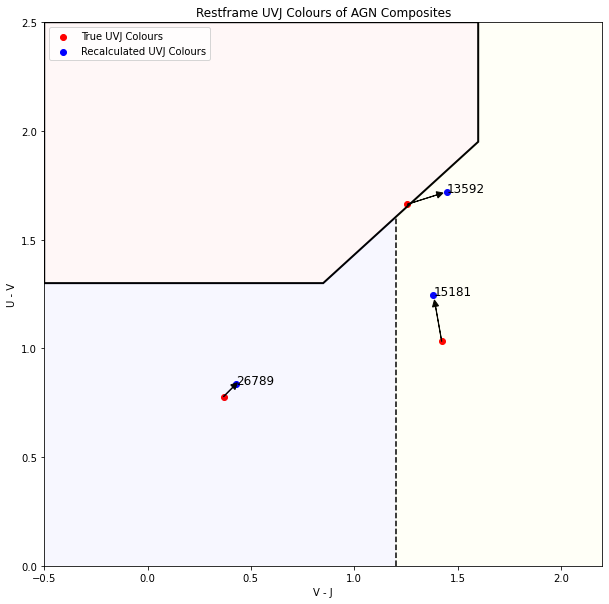

In [42]:
# Plot the UVJ diagram
plt.figure(figsize=(10, 10))
plt.scatter(selected_ids_df['vj'], selected_ids_df['uv'], c='r', label='True UVJ Colours')
plt.scatter(recalculated_df['VJ'], recalculated_df['UV'], c='b', label='Recalculated UVJ Colours')
# Plot an arrow to show the direction the UVJ point has moved from the selected id at index 1, to the recalculated at index 1, etc
b =0.75
a = b
for i in range(len(selected_ids_df)):
    # Making sure the arrow tip is at the position of the new UVJ point, not covering it
    #plt.arrow(selected_ids_df['vj'][i], selected_ids_df['uv'][i], recalculated_df['VJ'][i] - selected_ids_df['vj'][i], recalculated_df['UV'][i] - selected_ids_df['uv'][i], head_width=0.05, head_length=0.09, fc='k', ec='k')
    # Mark an arrow from the red dot to the blue dot, but make sure the arrow head is not covering the blue dot
    #plt.arrow(selected_ids_df['vj'][i], selected_ids_df['uv'][i], recalculated_df['VJ'][i] - selected_ids_df['vj'][i], recalculated_df['UV'][i] - selected_ids_df['uv'][i], head_width=0.05, head_length=0.09, fc='k', ec='k')
    plt.arrow(selected_ids_df['vj'][i], selected_ids_df['uv'][i], (recalculated_df['VJ'][i] - selected_ids_df['vj'][i])*a, (recalculated_df['UV'][i] - selected_ids_df['uv'][i])*b, head_width=0.03, head_length=0.03, fc='k', ec='k')
plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Plot the names
for i in range(len(selected_ids_df)):
    #plt.text(selected_ids_df['vj'][i], selected_ids_df['uv'][i], selected_ids_df['id'][i], fontsize=12)
    plt.text(recalculated_df['VJ'][i], recalculated_df['UV'][i], recalculated_df['ID'][i], fontsize=12)

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)
plt.legend()
plt.show()